In [1]:
import os, glob, sys, pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

plt.rcParams.update({'font.size': 15})
rc('font', size=12)
rc('font', family='Arial')
# plt.style.use('dark_background')
rc('pdf', fonttype=42)

In [2]:
#folder = os.path.join('..','Revise','circurarity','day7')
folder = os.path.join('Z:/Marina/20210830_somitoid_data/Fig1/f/day7-3')
flist = glob.glob(os.path.join(folder,'*_SomiteSize.pickle'))
flist.sort()
folder

'Z:/Marina/20210830_somitoid_data/Fig1/f/day7-3'

In [3]:
flist

['Z:/Marina/20210830_somitoid_data/Fig1/f/day7-3\\7-3_SomiteSize.pickle']

In [4]:
### read data
data = []

for fname in flist:
    with open(fname, 'rb') as handle:
        a = pickle.load(handle)

    circularities = []

    for i in range(len(a['somite_size']['area'])):

        l = a['somite_size']['length'][i]
        w = a['somite_size']['width'][i]
        area = a['somite_size']['area'][i]*1e-6

        majax = 1e-3*np.max([l,w])
        minax = 1e-3*np.min([l,w])

        perimeter = np.pi*(3*(majax+minax)-np.sqrt(10*majax*minax+3*(majax**2+minax**2)))
        circularity = 4*np.pi*area/perimeter

        circularities.append(circularity)

    a['somite_size']['circularity'] = circularities
        
    data.append([a])

In [5]:
os.path.splitext(os.path.split(flist[0])[-1])[0]

'7-3_SomiteSize'

In [6]:
print(data[0][0].keys())

print(data[0][0]['midline'].keys())
print(data[0][0]['segmentation_params'].keys())
print(data[0][0]['somite_size'].keys())


dict_keys(['midline', 'segmentation_params', 'img', 'mask', 'somite_size', 'somite_lims'])
dict_keys(['endpoints', 'ps', 'ts', 'ns', 'arc_length', 'profile'])
dict_keys(['thr_type', 'max_hole', 'min_object', 'disk_size'])
dict_keys(['area', 'length', 'width', 'circularity'])


In [7]:
area = np.array([d[0]['somite_size']['area'] for d in data])*1e-6
length = [d[0]['somite_size']['length'] for d in data]
width = [d[0]['somite_size']['width'] for d in data]
circularity = [d[0]['somite_size']['circularity'] for d in data]

In [8]:
df = pd.DataFrame({})

for i in range(len(area)):
    f = os.path.splitext(os.path.split(flist[i])[-1])[0]
    a = area[i]
    l = length[i]
    w = width[i]
    c = circularity[i]
    n = 1+np.arange(len(a))
    
    df1 = pd.DataFrame({
                        'fname':f,
                        'somite_n':n,
                        'area':a,
                        'length':l,
                        'width':w,
                        'circularity':c
                       })
    
    df = pd.concat([df, df1], ignore_index=True)
    

In [9]:
df

,fname,somite_n,area,length,width,circularity
0,7-3_SomiteSize,1,0.020155,118.421984,180.504302,0.266814
1,7-3_SomiteSize,2,0.022570,133.647668,182.127046,0.284220
2,7-3_SomiteSize,3,0.026077,159.023808,174.422792,0.312654
3,7-3_SomiteSize,4,0.039326,219.926542,207.933123,0.367584
4,7-3_SomiteSize,5,0.044504,231.768741,213.662876,0.399487


In [10]:
df.to_csv('SomiteMorpho_Plotting.csv', index=False)

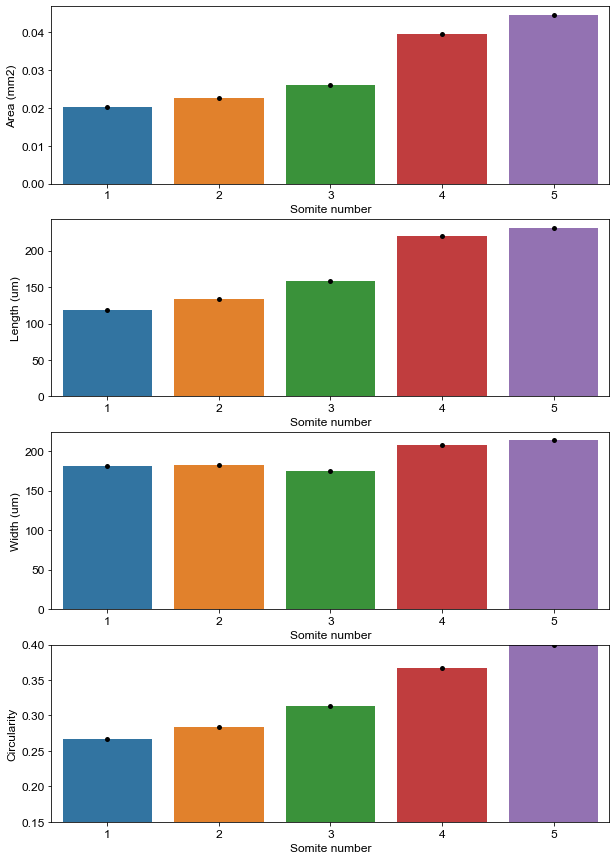

In [11]:
fig, ax = plt.subplots(4,1,figsize=(10,15))
sns.barplot(data=df,x='somite_n',y='area',ax=ax[0])
sns.swarmplot(data=df,x='somite_n',y='area',ax=ax[0], dodge=True, color='k')
sns.barplot(data=df,x='somite_n',y='length',ax=ax[1])
sns.swarmplot(data=df,x='somite_n',y='length',ax=ax[1], dodge=True, color='k')
sns.barplot(data=df,x='somite_n',y='width',ax=ax[2])
sns.swarmplot(data=df,x='somite_n',y='width',ax=ax[2], dodge=True, color='k')
sns.barplot(data=df,x='somite_n',y='circularity',ax=ax[3])
sns.swarmplot(data=df,x='somite_n',y='circularity',ax=ax[3], dodge=True, color='k')

ax[0].set_ylabel('Area (mm2)')
ax[1].set_ylabel('Length (um)')
ax[2].set_ylabel('Width (um)')
ax[3].set_ylabel('Circularity')
ax[0].set_xlabel('Somite number')
ax[1].set_xlabel('Somite number')
ax[2].set_xlabel('Somite number')
ax[3].set_xlabel('Somite number')

ax[3].set_ylim(0.15,0.4)

fig.savefig('SomiteMorpho_Plotting.pdf')